In [1]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import warnings
warnings.filterwarnings("ignore")
import math

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from env import get_connection

Clustering - DBSCAN
- Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
- Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
- Use DBSCAN to detect anomalies for the wine dataset you used in the clustering project.

In [2]:
#Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
query = 'select * from grocery_customers'

url = get_connection('grocery_db')

df = pd.read_sql(query, url)

In [3]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customer_id       440 non-null    int64
 1   Channel           440 non-null    int64
 2   Region            440 non-null    int64
 3   Fresh             440 non-null    int64
 4   Milk              440 non-null    int64
 5   Grocery           440 non-null    int64
 6   Frozen            440 non-null    int64
 7   Detergents_Paper  440 non-null    int64
 8   Delicassen        440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [5]:
df1 = df[['Region', 'Fresh']]

In [6]:
df1_array = df1.values.astype('float32', copy= False)

In [7]:
scaler = StandardScaler().fit(df1_array)
df1_array = scaler.transform(df1_array)

In [8]:
df1_array
#looks like all the values in region are the same.
#check to see how many distinct values are in Region

array([[ 5.90668321e-01,  5.29331900e-02],
       [ 5.90668321e-01, -3.91301990e-01],
       [ 5.90668321e-01, -4.47029263e-01],
       [ 5.90668321e-01,  1.00111410e-01],
       [ 5.90668321e-01,  8.40239465e-01],
       [ 5.90668321e-01, -2.04805523e-01],
       [ 5.90668321e-01,  9.95035097e-03],
       [ 5.90668321e-01, -3.49981457e-01],
       [ 5.90668321e-01, -4.77900922e-01],
       [ 5.90668321e-01, -4.74497139e-01],
       [ 5.90668321e-01, -6.83474481e-01],
       [ 5.90668321e-01,  9.06915963e-02],
       [ 5.90668321e-01,  1.56049895e+00],
       [ 5.90668321e-01,  7.29576468e-01],
       [ 5.90668321e-01,  1.00156367e+00],
       [ 5.90668321e-01, -1.38312742e-01],
       [ 5.90668321e-01, -8.69179308e-01],
       [ 5.90668321e-01, -4.84787673e-01],
       [ 5.90668321e-01,  5.22498906e-01],
       [ 5.90668321e-01, -3.34070683e-01],
       [ 5.90668321e-01,  4.38987136e-01],
       [ 5.90668321e-01, -5.09247541e-01],
       [ 5.90668321e-01,  1.52582765e+00],
       [ 5.

In [9]:
df.Region.nunique()
# ok there are 3 different regions.  but still probably not the best to use
#try hue for Region and pick a continuous variable to replace it for col1
#redefine and scale again

3

In [10]:
df1 = df[['Milk', 'Grocery']]

In [11]:
df1_array = df1.values.astype('float32', copy= False)

In [12]:
#fit StandardScaler to the array and assign to variable
scaler = StandardScaler().fit(df1_array)
#reassign array variable to itself but transformed by the scaler
df1_array = scaler.transform(df1_array)

In [13]:
df1_array

array([[ 5.23567796e-01, -4.11148928e-02],
       [ 5.44457674e-01,  1.70318365e-01],
       [ 4.08537716e-01, -2.81571019e-02],
       [-6.24019980e-01, -3.92976910e-01],
       [-5.23964539e-02, -7.93561861e-02],
       [ 3.34066600e-01, -2.97637045e-01],
       [-3.52315634e-01, -1.02848768e-01],
       [-1.13980949e-01,  1.55358955e-01],
       [-2.91409403e-01, -1.85336173e-01],
       [ 7.18494892e-01,  1.15142345e+00],
       [-5.33459932e-02,  5.29133320e-01],
       [-6.33786678e-01, -3.61161828e-01],
       [ 8.84800136e-01,  4.00924921e-01],
       [ 5.58511801e-02,  7.40671933e-01],
       [ 4.97658879e-01,  4.36111122e-01],
       [-6.35143161e-01, -4.35116082e-01],
       [ 4.09622908e-01,  4.39271539e-01],
       [ 4.89331000e-02, -5.28665006e-01],
       [ 7.19933659e-02,  2.26258084e-01],
       [-4.47812319e-01,  1.59362182e-01],
       [-1.73259407e-01, -3.52839351e-01],
       [-6.68105781e-01, -6.25901103e-01],
       [-5.26217222e-01, -3.66850615e-01],
       [ 4.

Create DBSCAN object and fit

In [14]:
dbsc = DBSCAN(eps= .75, min_samples=15).fit(df1_array)

In [15]:
dbsc

DBSCAN(eps=0.75, min_samples=15)

Extract labels

In [16]:
labels = dbsc.labels_

In [17]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Add labels back to original dataframe

In [18]:
df['labels'] = labels

In [19]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,0,2,3,12669,9656,7561,214,2674,1338,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0
3,3,1,3,13265,1196,4221,6404,507,1788,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0


Explore

so far, DBSCAN was used to cluster the two categories I wanted I chose to look for anomalies and assigned labels to each observation according to which cluster it fell into.  then a new column was created for the labels.  Now that the clustering is done and labels assigned, explore the data.

In [20]:
df.labels.value_counts()

 0    417
-1     23
Name: labels, dtype: int64

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

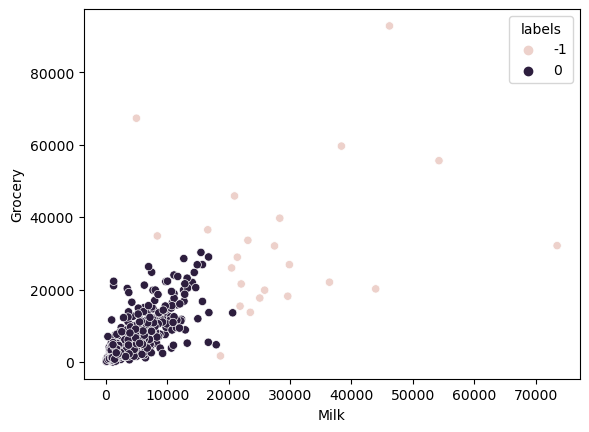

In [21]:
sns.scatterplot(df.Milk, df.Grocery, hue= df.labels)

In [22]:
# turn the work above into functions to use on the next two datasets.  save functions in module for this section of course and 
#also save it global module for data science

def DBSCAN_and_scatterplot(df, col1, col2, eps= .75, min_samples= 15, scaler_type= StandardScaler):
    #create new df with the columns given in the arguments
    df1 = df[[col1, col2]]
    #convert that new df into an array with float dtypes
    df1_array = df1.values.astype('float32', copy= False)
    #define scaler I want to use
    scaler = scaler_type().fit(df1_array)
    df1_array = scaler.transform(df1_array)
    #fit scaler_type to the array and assign to variable
    scaler = scaler_type().fit(df1_array)
    #reassign array variable to itself but transformed by the scaler
    df1_array = scaler.transform(df1_array)
    #perform dbscan on the new array with the parameters given in the arguments
    dbsc = DBSCAN(eps= eps, min_samples=min_samples).fit(df1_array)
    #define lables
    labels = dbsc.labels_
    #make new column for labels
    df['labels'] = labels
    #explore, show value_counts of our new labels, 
    value_counts = df.labels.value_counts()
    plot1 = sns.scatterplot(df[col1], df[col2], hue= df.labels)

    return df, value_counts, plot1
    

Clustering - DBSCAN
- Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
- Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
- Use DBSCAN to detect anomalies for the wine dataset you used in the clustering project.

(     customer_id  Channel  Region  Fresh   Milk  Grocery  Frozen  \
 0              0        2       3  12669   9656     7561     214   
 1              1        2       3   7057   9810     9568    1762   
 2              2        2       3   6353   8808     7684    2405   
 3              3        1       3  13265   1196     4221    6404   
 4              4        2       3  22615   5410     7198    3915   
 ..           ...      ...     ...    ...    ...      ...     ...   
 435          435        1       3  29703  12051    16027   13135   
 436          436        1       3  39228   1431      764    4510   
 437          437        2       3  14531  15488    30243     437   
 438          438        1       3  10290   1981     2232    1038   
 439          439        1       3   2787   1698     2510      65   
 
      Detergents_Paper  Delicassen  labels  
 0                2674        1338       0  
 1                3293        1776       0  
 2                3516        7844 

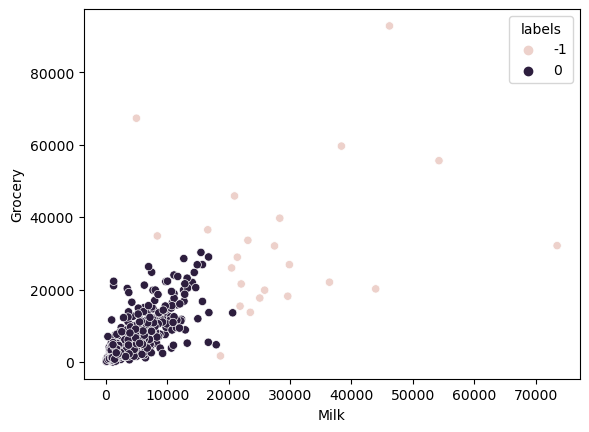

In [23]:
#test function to make sure it works then use it on the other two datasets

query = 'select * from grocery_customers'

url = get_connection('grocery_db')

df = pd.read_sql(query, url)

DBSCAN_and_scatterplot(df, 'Milk', 'Grocery')

In [27]:
# for loop to plot all continuous columns with db scan

cols = ['customer_id', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicassen', 'labels']

In [28]:
cols

['customer_id',
 'Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'labels']

(     customer_id  Channel  Region  Fresh   Milk  Grocery  Frozen  \
 0              0        2       3  12669   9656     7561     214   
 1              1        2       3   7057   9810     9568    1762   
 2              2        2       3   6353   8808     7684    2405   
 3              3        1       3  13265   1196     4221    6404   
 4              4        2       3  22615   5410     7198    3915   
 ..           ...      ...     ...    ...    ...      ...     ...   
 435          435        1       3  29703  12051    16027   13135   
 436          436        1       3  39228   1431      764    4510   
 437          437        2       3  14531  15488    30243     437   
 438          438        1       3  10290   1981     2232    1038   
 439          439        1       3   2787   1698     2510      65   
 
      Detergents_Paper  Delicassen  labels  
 0                2674        1338       0  
 1                3293        1776       0  
 2                3516        7844 

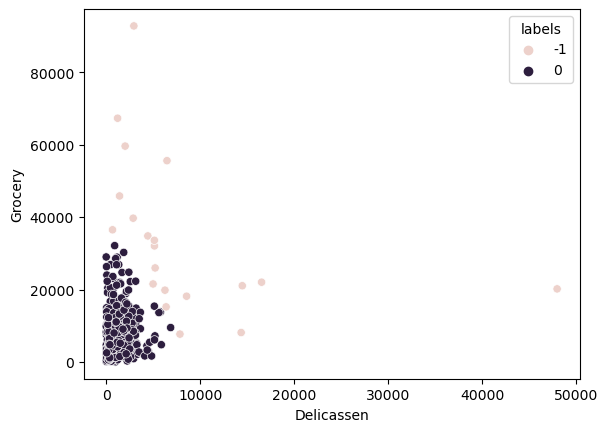

In [33]:
DBSCAN_and_scatterplot(df, 'Delicassen', 'Grocery')
    

(     customer_id  Channel  Region  Fresh   Milk  Grocery  Frozen  \
 0              0        2       3  12669   9656     7561     214   
 1              1        2       3   7057   9810     9568    1762   
 2              2        2       3   6353   8808     7684    2405   
 3              3        1       3  13265   1196     4221    6404   
 4              4        2       3  22615   5410     7198    3915   
 ..           ...      ...     ...    ...    ...      ...     ...   
 435          435        1       3  29703  12051    16027   13135   
 436          436        1       3  39228   1431      764    4510   
 437          437        2       3  14531  15488    30243     437   
 438          438        1       3  10290   1981     2232    1038   
 439          439        1       3   2787   1698     2510      65   
 
      Detergents_Paper  Delicassen  labels  
 0                2674        1338       0  
 1                3293        1776       0  
 2                3516        7844 

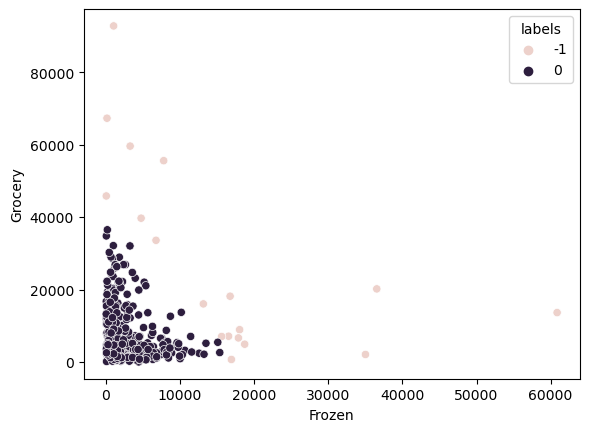

In [34]:
DBSCAN_and_scatterplot(df, 'Frozen', 'Grocery')

- - -
Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

In [53]:
curriculum = pd.read_csv('curriculum_logs.csv')

In [54]:
curriculum.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [55]:
curriculum = curriculum.set_index('date')

In [56]:
curriculum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 48.1+ MB


In [57]:
DBSCAN_and_scatterplot(curriculum, 'ip', 'user_id')

ValueError: could not convert string to float: '97.105.19.61'

- - -
Use DBSCAN to detect anomalies for the wine dataset you used in the clustering project.

In [58]:
wine = pd.read_csv('winequality.csv')

In [59]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5.5              0.29         0.30             1.1      0.022   
 6496            6.0              0.21         0.38             0.8      0.020   
 
       free su

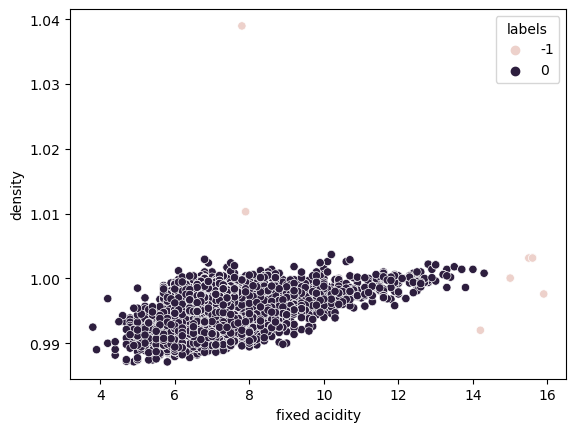

In [63]:
DBSCAN_and_scatterplot(wine, 'fixed acidity', 'density')


(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5.5              0.29         0.30             1.1      0.022   
 6496            6.0              0.21         0.38             0.8      0.020   
 
       free su

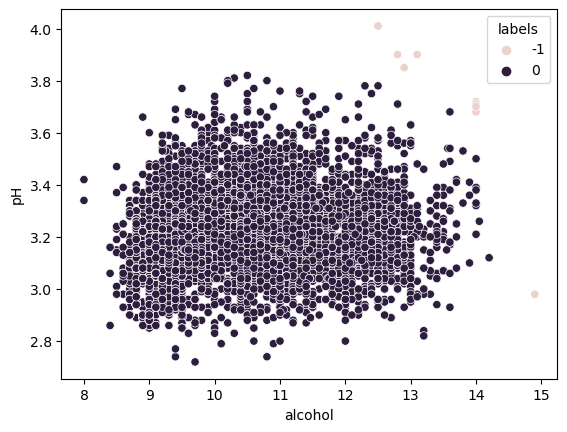

In [64]:
DBSCAN_and_scatterplot(wine, 'alcohol', 'pH')

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5.5              0.29         0.30             1.1      0.022   
 6496            6.0              0.21         0.38             0.8      0.020   
 
       free su

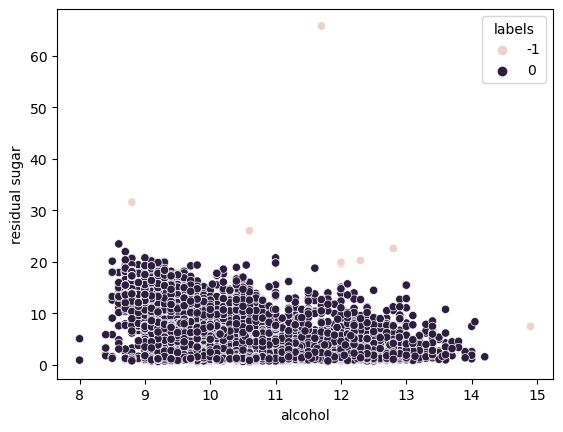

In [62]:
DBSCAN_and_scatterplot(wine, 'alcohol', 'residual sugar')

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5.5              0.29         0.30             1.1      0.022   
 6496            6.0              0.21         0.38             0.8      0.020   
 
       free su

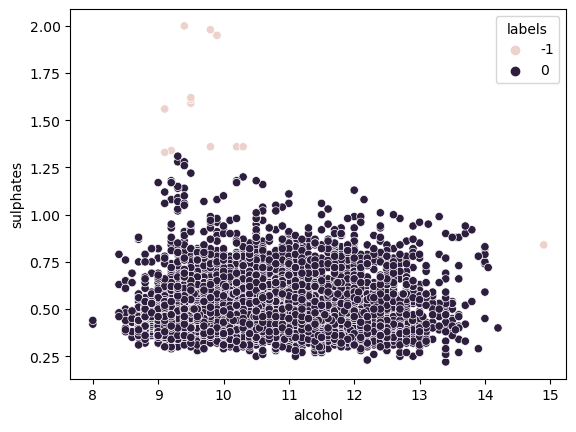

In [65]:
DBSCAN_and_scatterplot(wine, 'alcohol', 'sulphates')